# 워드 클라우드

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

In [28]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

## Alice in Wonderland

In [36]:
text = open('data/wordcloud/wc1.alice.txt').read()
alice_mask = np.array(Image.open('data/wordcloud/wc5.heart.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('said')

In [31]:
len(STOPWORDS)

192

In [32]:
len(stopwords)

192

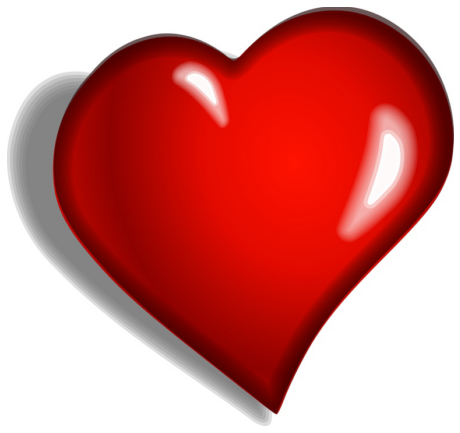

In [33]:
plt.figure(figsize = (8, 8))
plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
# Stopwords 제거
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [81]:
wc = WordCloud(background_color='white', max_words=2000, mask = alice_mask)
wc = wc.generate(text)
wc.words_

{'Luke': 1.0,
 'Han': 0.46095238095238095,
 'DEATH STAR': 0.4266666666666667,
 'THREEPIO': 0.4,
 'Ben': 0.2914285714285714,
 'ship': 0.21523809523809523,
 'Leia': 0.2019047619047619,
 'one': 0.18285714285714286,
 'Artoo': 0.17333333333333334,
 'look': 0.16952380952380952,
 'RED LEADER': 0.16952380952380952,
 'back': 0.15619047619047619,
 'going': 0.13904761904761906,
 'two': 0.13142857142857142,
 'Biggs': 0.13142857142857142,
 'move': 0.13142857142857142,
 'INT DEATH': 0.1295238095238095,
 'TIE fighter': 0.1295238095238095,
 'EXT SPACE': 0.12761904761904763,
 'Vader': 0.12571428571428572,
 'see': 0.1219047619047619,
 'MILLENNIUM FALCON': 0.1219047619047619,
 'right': 0.1180952380952381,
 'LUKE WING': 0.1180952380952381,
 'trooper': 0.11428571428571428,
 'robot': 0.10857142857142857,
 'small': 0.10666666666666667,
 'toward': 0.10476190476190476,
 'now': 0.09904761904761905,
 'WING FIGHTER': 0.09904761904761905,
 'take': 0.09714285714285714,
 'begin': 0.09714285714285714,
 'make': 0.0952

<function matplotlib.pyplot.show(*args, **kw)>

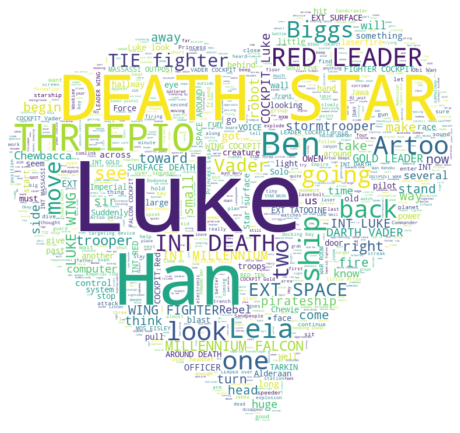

In [82]:
plt.figure(figsize = (8, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show

# Star Wars - A new hope

In [83]:
text = open('data/wordcloud/wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("HUKE'S", 'Luke')

mask = np.array(Image.open('data/wordcloud/wc4. stormtrooper_mask.png'))

In [84]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [85]:
# Stopwords 제거
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [86]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
               margin=10, random_state=150).generate(text)
default_colors = wc.to_array()

In [87]:
import random
def grey_color_func(word, font_size, position, orientation,
                    random_state = None, **kwargs):
    return 'hsl(0, 0%%, %d%%)'%random.randint(60, 100)

In [88]:
s = 'hsl(0, 0%%, %d%%)'%random.randint(60, 100)
s

'hsl(0, 0%, 67%)'

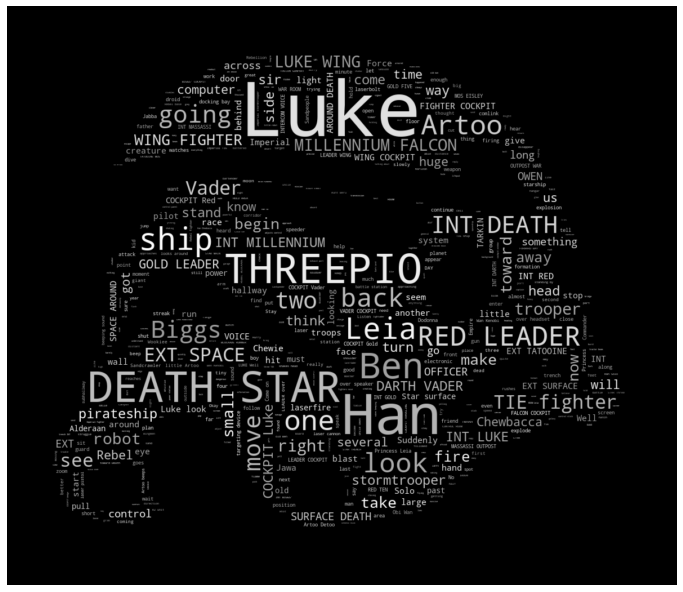

In [89]:
plt.figure(figsize = (12, 12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state = 150),
           interpolation='bilinear')
plt.axis('off')
plt.show()

## 여자 친구 선물 고르기

In [48]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [55]:
html_= 'https://kin.naver.com/search/list.nhn?'
html = html_ + 'query={key_word}&page={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [56]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:5]

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [57]:
from tqdm import tqdm_notebook

In [91]:
import tqdm

In [100]:
present_candi_text = []
for n in tqdm.notebook.tqdm(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        line_str = line.text.replace('\t', '').replace('\n', '')
        present_candi_text.append(line_str)
        
    time.sleep(0.5)

In [101]:
with open("data/wordcloud/wc6_present_candi.txt", "w", -1, 'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [102]:
present_candi_text[:10]

['여자친구 선물해주려구요2020.06.03.여자친구가 첨으로 독립을 하게되서 축하기념으로 선물하려하는데요 여자친구 선물은... 사양해요  여자친구 선물로 좀 특별한걸 선물해주세요 보면 생각이 자주나는걸로요... Q&A > 가족행사, 이벤트|답변수 5\xa0추천수 0',
 '20대여자친구선물 하카 전자담배... 2020.06.18.... 전자담배 중에 20대여자친구선물로 줄만한 것 찾고 있는데 하카 전자담배는 어떨지 궁금합니다.  안녕하세요 20대여자친구선물 하카 전자담배는 어떤지 고민중이시군요!... Q&A > 술, 담배|답변수 2\xa0추천수 0',
 '여자친구 선물 추천 부탁드립니다.(목걸이)2020.06.06.안녕하세요 여자친구 선물로 목걸이를 선물하고 싶어서 이렇게 글을 올립니다. 제가 쥬얼리 쪽은 브랜드가 어떻게 되어 있는지 잘 몰라서요. 20대 중반 저랑 동갑인... Q&A > 목걸이, 펜던트|답변수 6\xa0추천수 0',
 '여자친구 선물 추천 부탁드려요~2020.01.20.저기요...여자친구 선물 추천 좀 해 주세요~ 너무... 괜찮은 여자친구 선물 추천 부탁드립니다~  요즘 겨울이라서... 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨, 로션이... Q&A > 가족행사, 이벤트|답변수 39\xa0추천수 0',
 '여자친구 선물2020.04.29.여자친구 선물 로즈데이에 장미 외에 선물할 수 있는 게 있을까요? 아직 연애 초라서 여러가지 기념일을 많이 챙겨주고 싶네요.  저는 조금 특별한 선물을... #여자친구선물#여친선물#로즈데이선물Q&A > 가족행사, 이벤트|답변수 10\xa0추천수 0',
 '여자친구 선물로 감동적인게 뭐가... 2020.04.07.... 못하고요 여자친구 선물로 감동적인 것 좀 알려주세요  안녕하세요 여자친구 선물을 고민하고 계시군요 제가... 있더라고요 여자 친구 선물로 값비싼 선물보다 오래도록... Q&A > 목걸이, 펜던트|답변수 1\xa0추천수 0',
 '여자친구 선물 ..감동받게 하고 싶어요2020.01.0

In [103]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [104]:
from konlpy.tag import Okt
okt = Okt()

In [105]:
gifts = okt.nouns(present_text)
gifts[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [106]:
import nltk
gitfs = nltk.Text(gifts, name='여자 친구 선물')
print(len(gitfs.tokens))
print(len(set(gitfs.tokens)))

25766
705


In [107]:
gitfs.vocab().most_common(100)

[('선물', 3025),
 ('여자친구', 2952),
 ('목걸이', 2607),
 ('수', 2005),
 ('추천', 1955),
 ('답변', 1033),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 522),
 ('결혼', 376),
 ('고민', 294),
 ('상담', 144),
 ('이성', 142),
 ('쥬니버', 126),
 ('네이버', 121),
 ('용법', 121),
 ('가족', 86),
 ('이벤트', 86),
 ('행사', 83),
 ('초', 78),
 ('내공', 78),
 ('고', 74),
 ('문구', 69),
 ('만년필', 67),
 ('미술', 67),
 ('용품', 67),
 ('중학생', 62),
 ('좀', 46),
 ('제', 41),
 ('화장품', 34),
 ('뭐', 33),
 ('생각', 27),
 ('여자', 23),
 ('생일', 22),
 ('지갑', 22),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('향수', 17),
 ('것', 16),
 ('가격', 16),
 ('크리스마스', 16),
 ('거', 15),
 ('이번', 15),
 ('커플', 14),
 ('로', 13),
 ('질문', 13),
 ('뭘', 12),
 ('게', 11),
 ('꽃', 11),
 ('반지', 11),
 ('쇼핑', 11),
 ('감동', 10),
 ('살', 10),
 ('브랜드', 9),
 ('기념일', 9),
 ('가방', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('정도', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('친구', 8),
 ('카드', 8),
 ('이제', 8),
 ('팔찌', 8),

In [109]:
print(set(gitfs.tokens))

{'겟잇뷰티', '김', '포니테일', '쥬얼리', '비스킷', '안', '영화', '악세사리', '연상연하', '진주', '장미꽃', '시티', '향', '금함', '빼빼로데이', '얼굴', '체형', '가기', '뭘', '인터넷', '용도', '집업', '데', '처럼', '철', '티나', '확인', '후', '괸찮치만', '바', '경우', '소나기', '밍', '티', '전', '자몽', '중지', '포장', '무슨', '날씨', '목걸이', '대충', '용인', '답변', '주니', '일주년', '초소', '우정', '발레', '입문', '사이트', '힘', '오락', '규어', '도움', '셀', '향수', '계절', '팩트', '티셔츠', '담배', '저번', '기억', '하니', '다담', '때', '겸', '고급', '채팅', '이', '메이크업', '확행', '대요', '문제', '구류', '의견', '블랙베리', '선', '투맨', '일단', '고', '교환학생', '반나절', '컬러', '다이어트', '체크', '다이아', '가장', '너클', '용', '문구', '수', '전후', '점', '꼭', '한번', '졸업', '기념일', '성분', '말', '무엇', '신경', '치가', '행사', '타이밍', '토닥토닥', '저가', '이자', '다른', '대학입학', '요즘', '행정', '부탁', '동갑', '일주일', '에스티', '아이폰', '거도', '여성', '직접', '언니', '화이트데이', '마우스패드', '욕설', '초등학교', '가죽', '겨울', '쇼', '달무드등', '비비드', '데이', '만', '루', '신고', '모바일폰', '그게', '안나', '마카롱', '에센스', '크롬', '둘', '드림', '입생로랑', '럼', '만년필', '뷰티', '의류', '머그컵', '가격', '톤', '봣', '번', '로션', '중고', '후드', '실버', '셜', '학년', '강추', '은근', '원래', '무협',

In [111]:
set(gitfs.tokens)

{'가게',
 '가격',
 '가기',
 '가디건',
 '가발',
 '가방',
 '가성',
 '가요',
 '가을',
 '가장',
 '가전',
 '가족',
 '가죽',
 '가지',
 '감동',
 '값',
 '강남',
 '강추',
 '개',
 '갤럭시',
 '거',
 '거나',
 '거도',
 '거리',
 '거의',
 '건',
 '건강',
 '건조과일',
 '건즈더듀얼',
 '걸',
 '검',
 '것',
 '게',
 '게이',
 '겟잇뷰티',
 '겨울',
 '결과',
 '결혼',
 '겸',
 '경우',
 '계절',
 '계획',
 '고',
 '고급',
 '고등학교',
 '고등학생',
 '고민',
 '고삼',
 '고생',
 '고수',
 '고요',
 '고해',
 '고향',
 '곧',
 '곳',
 '공예',
 '공주',
 '관리',
 '광역',
 '광장',
 '괜찬을듯해',
 '괸찮치만',
 '교통',
 '교환학생',
 '구',
 '구류',
 '구영',
 '구피',
 '군',
 '군대',
 '귀걸이',
 '규어',
 '그',
 '그것',
 '그게',
 '그냥',
 '그동안',
 '그랜피',
 '그룹',
 '근방',
 '글',
 '글구',
 '금',
 '금함',
 '기',
 '기념',
 '기념일',
 '기도',
 '기분',
 '기억',
 '기초',
 '기타',
 '길찾기',
 '김',
 '꼭',
 '꽃',
 '꽃집',
 '꾸띠르',
 '꿈',
 '끼',
 '나이',
 '나중',
 '날',
 '날씨',
 '남성',
 '남자',
 '내공',
 '내내',
 '너',
 '너클',
 '네',
 '네이버',
 '네이션',
 '넥타이',
 '노미',
 '노트북',
 '녹음기',
 '놀이',
 '누가',
 '니트',
 '님들',
 '다담',
 '다른',
 '다시',
 '다음',
 '다음주',
 '다이아',
 '다이어트',
 '달',
 '달달',
 '달무드등',
 '담배',
 '답변',
 '당장',
 '대도',
 '대면',
 '대비',
 '대요',
 '대충',
 '대학',
 '대학생',
 '

In [114]:
sw_text = ' '.join([str(elem) for elem in set(gitfs.tokens)])
print(sw_text)

겟잇뷰티 김 포니테일 쥬얼리 비스킷 안 영화 악세사리 연상연하 진주 장미꽃 시티 향 금함 빼빼로데이 얼굴 체형 가기 뭘 인터넷 용도 집업 데 처럼 철 티나 확인 후 괸찮치만 바 경우 소나기 밍 티 전 자몽 중지 포장 무슨 날씨 목걸이 대충 용인 답변 주니 일주년 초소 우정 발레 입문 사이트 힘 오락 규어 도움 셀 향수 계절 팩트 티셔츠 담배 저번 기억 하니 다담 때 겸 고급 채팅 이 메이크업 확행 대요 문제 구류 의견 블랙베리 선 투맨 일단 고 교환학생 반나절 컬러 다이어트 체크 다이아 가장 너클 용 문구 수 전후 점 꼭 한번 졸업 기념일 성분 말 무엇 신경 치가 행사 타이밍 토닥토닥 저가 이자 다른 대학입학 요즘 행정 부탁 동갑 일주일 에스티 아이폰 거도 여성 직접 언니 화이트데이 마우스패드 욕설 초등학교 가죽 겨울 쇼 달무드등 비비드 데이 만 루 신고 모바일폰 그게 안나 마카롱 에센스 크롬 둘 드림 입생로랑 럼 만년필 뷰티 의류 머그컵 가격 톤 봣 번 로션 중고 후드 실버 셜 학년 강추 은근 원래 무협 마리오 화장품 좀 고민 제품 기초 은행 떄 최근 스탠드 모두 무료 류량 이면 정해 길찾기 디자인 고요 더 쭈니 뭐 암거 제주도 지금 베스트 생각 용법 순간 걸 축하 취미 명절 시간 언제 진 빼 귀걸이 백화점 샤넬 사려 조언 코튼 중 상큼 하루하루 한민 기 사서 하카 살이 넥타이 아이디어 별로 만들기 현금 종류 머 초콜릿 양산 가디건 강남 결과 토 혹시 친 천연 드림캐쳐 사람과 로즈데이 주년 초콜렛 정 상담 구 추억 얼마 펄찌 전자담배 지갑 핸드 액션 오즈 무난 마크 정말 재회 네이버 저녁 립스틱 메세지 사실 실용 윈도우 치 제외 초반 개 가성 크게 대도 앤북 포함 쪼금 영구 달 핸드폰 거리 백 광역 준비 가발 동안 루나 주위 왜 남자 부분 어쨌든 오세아니아 티니 미리 가을 쇼핑 꾸띠르 하루 양해 다음주 기분 중국 초딩 프리저 기념 사랑 글구 병영 용산 피어싱 네이션 펜션 건 목 학기 미투데이 메이커 손가락 팔찌 고생 전문 목도리 생활 금 적 처음 러브레터 브

In [119]:
sw_text = "겟잇뷰티 포니테일 안 영화 연상연하 시티 향 금함 빼빼로데이 얼굴 체형 가기 뭘 인터넷 용도 집업 데 처럼 철 티나 확인 후 괸찮치만 바 경우 소나기 밍 티 전 자몽 중지 포장 무슨 날씨 대충 용인 답변 주니 일주년 초소 우정 발레 입문 사이트 힘 오락 규어 도움 셀 계절 팩트 저번 기억 하니 다담 때 겸 고급 채팅 이 메이크업 확행 대요 문제 구류 의견 선 투맨 일단 고 교환학생 반나절 컬러 다이어트 체크 가장 용 문구 수 전후 점 꼭 한번 졸업 기념일 성분 말 무엇 신경 치가 행사 타이밍 토닥토닥 저가 이자 다른 대학입학 요즘 행정 부탁 동갑 일주일 에스티 거도 여성 직접 언니 화이트데이 욕설 초등학교 겨울 쇼 비비드 데이 만 루 신고 그게 안나 크롬 둘 드림 입생로랑 럼 뷰티 의류 가격 톤 봣 번 로션 중고 셜 학년 강추 은근 원래 무협 마리오 좀 고민 제품 기초 은행 떄 최근 모두 무료 류량 이면 정해 길찾기 디자인 고요 더 쭈니 뭐 암거 제주도 지금 베스트 생각 용법 순간 걸 축하 취미 명절 시간 언제 진 빼 백화점 사려 조언 코튼 중 상큼 하루하루 한민 기 사서 하카 살이 아이디어 별로 만들기 종류 머 강남 결과 토 혹시 친 천연 드림캐쳐 사람과 로즈데이 주년 정 상담 구 추억 얼마 펄찌 핸드 액션 오즈 무난 마크 정말 재회 네이버 저녁 메세지 사실 실용 윈도우 치 제외 초반 개 가성 크게 대도 앤북 포함 쪼금 영구 달 거리 광역 준비 동안 루나 주위 왜 남자 부분 어쨌든 오세아니아 티니 미리 가을 쇼핑 꾸띠르 하루 양해 다음주 기분 중국 초딩 프리저 기념 사랑 글구 병영 용산 네이션 펜션 건 목 학기 미투데이 메이커 손가락 고생 전문 생활 적 처음 러브레터 브랜드 사람 제격 이하 지식 님들 정도 음질 쪽 네 구영 중학생 참고 브드 약 손바닥 누가 지방선거 심즈 초등학생 성의 반 이틀 요 감동 성인 위 폭시 독립 친한친구 정성 우선 음식 고삼 방학 막상 또 해도 선물 향기 애니메이션 남성 세시 저 외 전역 따뚜아쥬 데이트 전부 편도 접 택배 추천 자주 현재 벌써 그 탈취 렐라 사업자 학생 게이 려고 패션 여자친구 여동생 교통 퍼온거 플랫슈즈 발렌타인데이 준 당장 스팅 피부 스 살껀데 오빠 완전 종합 때매 화장 고해 꽃집 미만 유얼 피 자 섬유 색깔 블루투스 내공 플립 서여 쥬니버 연락 해주시 꿈 정식 땜 코미디 포에버 제대로 행동 수수 호 하여튼 통화 루이까또즈 잡화 다음 루미 코스 피스 거 이중 색상 불가리 풍속 이제 팟 너 분 활용 래서 가족 음향 여의 생로랑 연인 글 블랙 옷 워터 대면 나중 고등학생 물품 잡고 등 달달 공예 홀로 날 크림 취업 아래 함 주 다시 거나 존경 저기 찬 값 최고 생일 연애 살 이내 카드 여러가지 테크 며칠 한편 부 첫 소개 이벤트 사주면 박 마디 전화 발렌타인 등등 벨벳 매일 구피 여름 비밀연애 리버 리얼 가게 것 둿 편지 전여자친구 파티 모델 틴트 뒤 송이 마음 고등학교 비 줄 근방 나이 점점 매 리스트 연말 거의 졸업식 제일 영양 지역 공주 사양 크리스마스 여자 놀이 인 를 시내 직업 햇빛 용품 예상 톰 군 인기 하나 수제 내내 슬 대학생 홍 산물 얘기 세트 최대 디올 적극 카메라 의미 관리 센스 그랜피 친구 부담 검 맛 가요 커플 중반 광장 색 차라리 맥 끼 방송 텀블러 안주 대학 질문 대해 군대 한지 해 학교생활 서도 일 작업 애 중후 빨강 오늘 부모님 곧 시구 제이콥 서울 이직 여친 이성 초 항상 고수 그룹 그것 음 괜찬을듯해 볶음 로 해주 결혼 회사 노미 고향 아이템 건즈더듀얼 주문 메트로 진짜 의식 건강 기타 이요 조금 이름 움 중동 이번 예비 민원 이니스프리 지식인 곳 르블랑 제 미술 그냥 청계 일찍 계획 부다 기도 도대체 우편 술 먼저 재료 그동안 호가 말씀 레몬 대비 포토 여행 후반 버스 때문 가지 상품 원데이 링 덕후 하트 레이스"

In [122]:
stop_words = sw_text.split()

In [130]:
# Stopwords 제거
text_ = [gitf for gitf in gitfs if gitf not in stop_words]
# text = ' '.join([str(elem) for elem in text_])

In [131]:
gifts = nltk.Text(gifts, name = '여자 친구 선물')

In [132]:
gifts.vocab().most_common(100)

[('선물', 3025),
 ('여자친구', 2952),
 ('목걸이', 2607),
 ('수', 2005),
 ('추천', 1955),
 ('답변', 1033),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 522),
 ('결혼', 376),
 ('고민', 294),
 ('상담', 144),
 ('이성', 142),
 ('쥬니버', 126),
 ('네이버', 121),
 ('용법', 121),
 ('가족', 86),
 ('이벤트', 86),
 ('행사', 83),
 ('초', 78),
 ('내공', 78),
 ('고', 74),
 ('문구', 69),
 ('만년필', 67),
 ('미술', 67),
 ('용품', 67),
 ('중학생', 62),
 ('좀', 46),
 ('제', 41),
 ('화장품', 34),
 ('뭐', 33),
 ('생각', 27),
 ('여자', 23),
 ('생일', 22),
 ('지갑', 22),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('향수', 17),
 ('것', 16),
 ('가격', 16),
 ('크리스마스', 16),
 ('거', 15),
 ('이번', 15),
 ('커플', 14),
 ('로', 13),
 ('질문', 13),
 ('뭘', 12),
 ('게', 11),
 ('꽃', 11),
 ('반지', 11),
 ('쇼핑', 11),
 ('감동', 10),
 ('살', 10),
 ('브랜드', 9),
 ('기념일', 9),
 ('가방', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('정도', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('친구', 8),
 ('카드', 8),
 ('이제', 8),
 ('팔찌', 8),

In [134]:
mask = np.array(Image.open('data/wordcloud/wc5.heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [137]:
data = gifts.vocab().most_common(200)

wordcloud = WordCloud(font_path='font/HMFMPYUN.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

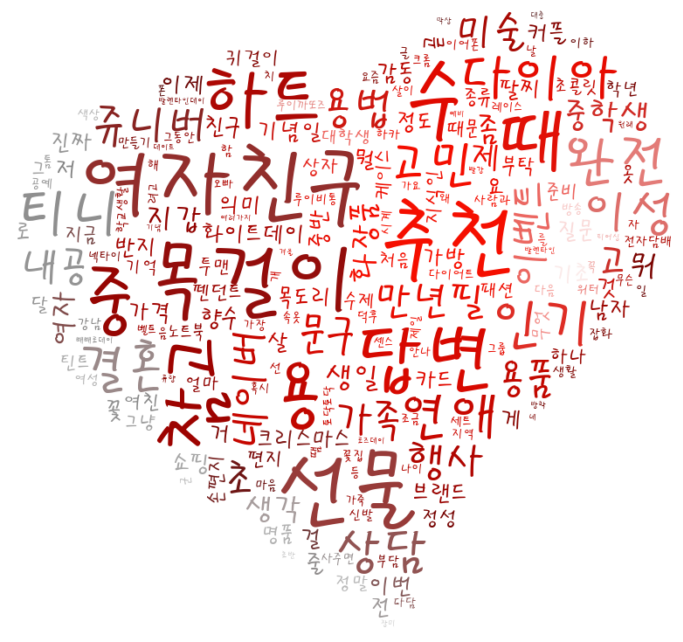

In [138]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()